<a href="https://colab.research.google.com/github/feicccccccc/colab_sandbox/blob/master/MNIST_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A test  to use colab to perform MNIST training using Pytorch

## First step: Import library including


1.   pytorch (deeplearning framework)
2.   torch vision (dataset)
3.   matplotlib (to plot graph)
4.   prepare CUDA for GPU training




In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

%matplotlib inline 

print("GPU availability : ", torch.cuda.is_available())
print("Number of GPU support : ",torch.cuda.device_count())

# The GPU deivce instance
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

print("GPU name : ",torch.cuda.get_device_name(device))

GPU availability :  True
Number of GPU support :  1
cuda:0
GPU name :  Tesla T4


### Get the MNIST data set from torch vision

In [3]:
train_dataset = torchvision.datasets.MNIST(root='./data',train=True, transform=transforms.ToTensor(), download = True)

test_dataset = torchvision.datasets.MNIST(root='./data',train=False, transform=transforms.ToTensor(), download = True)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=32, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 20043740.70it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 319488.76it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 5241411.90it/s]                           
8192it [00:00, 130802.06it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


###The shape of the data and the image

In [4]:
testing_iter = enumerate(test_loader)

print(train_loader.batch_sampler.sampler.data_source,"\n")

print("The shape of training data : ")
print("Number of smaple , width , height (1 channel image)")
print(train_dataset.data.shape,"\n")

batch_idx, (training_sample , sample_labels) = next(testing_iter)

print("training_batch index : ",batch_idx)
print("training_batch shape : ",training_sample.shape)

print("lable_batch shape : ",sample_labels.shape)

print()

batch_idx, (training_sample , sample_labels) = next(testing_iter)

print("training_batch index : ",batch_idx)
print("training_batch shape : ",training_sample.shape)

print("lable_bathchshape : ",sample_labels.shape)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train 

The shape of training data : 
Number of smaple , width , height (1 channel image)
torch.Size([60000, 28, 28]) 

training_batch index :  0
training_batch shape :  torch.Size([32, 1, 28, 28])
lable_batch shape :  torch.Size([32])

training_batch index :  1
training_batch shape :  torch.Size([32, 1, 28, 28])
lable_bathchshape :  torch.Size([32])


### Show part of the data set in term of pixel map and there output y

Their corresponding lables:  tensor([3, 4, 7, 2, 7])


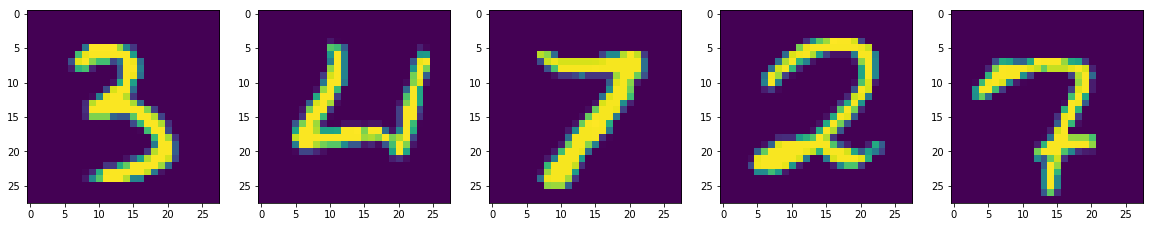

In [5]:
images=[]

for i in range(0,5):
  images.append(training_sample[i,0,:])

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    
print("Their corresponding lables: ", sample_labels[0:5])

### The training data is already normailised
### The follwing tensor is the 11 colume of the number 7 picutre.

In [6]:
print("Original data at x some pixel (col:11 of 3) = ", training_sample[0,0,:,11])

Original data at x some pixel (col:11 of 3) =  tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9961, 0.9922, 0.6941, 0.0000,
        0.0000, 0.0000, 0.2235, 0.9686, 0.9922, 0.9922, 0.8039, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.1608, 0.9843, 0.9922, 0.0000, 0.0000,
        0.0000])


### Build the neural network

In [0]:
import torch.nn.functional as F
import torch.optim as optim

In [0]:
class Net(nn.Module):
    def __init__(self): # with parameters to train
      # Use nn class , to handle wieght and bias internally
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        # in channel : 1, out channel : 10 , kernal : 5x5 square kernal
        # 28 in , 28 - 5 + 1 = 24 out
        # max pool = 12
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        # in channel : 10, out channel : 20 , kernal : 5x5 square kernal
        # 12 in , 12 - 5 + 1 = 8 out
        # max pool = 4
        self.conv2_drop = nn.Dropout2d()
        # 4 * 4 * 20 = 6000
        # dropout
        self.fc1 = nn.Linear(320, 50)
        
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x): # no parameter to train
      # Use functional , to avoid internal state
        #print(x.shape)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        #print(x.shape)
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        #print(x.shape)
        # flatten
        x = x.view(-1, 320)
        #print(x.shape)
        
        x = F.relu(self.fc1(x))
        #print(x.shape)
        x = F.dropout(x, training=self.training)
        #print(x.shape)
        x = self.fc2(x)
        #print(x.shape)
        return F.log_softmax(x,dim=-1)

In [9]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


### Parameters inside the NN

In [10]:
params = list(net.parameters())
print("number of layer",len(params)/2)

for i in range(0,int(len(params)/2)):
    print("Layer ",i," parametrers shape :",params[i].size())
    print("Layer ",i," bias :",params[i+1].size())


number of layer 4.0
Layer  0  parametrers shape : torch.Size([10, 1, 5, 5])
Layer  0  bias : torch.Size([10])
Layer  1  parametrers shape : torch.Size([10])
Layer  1  bias : torch.Size([20, 10, 5, 5])
Layer  2  parametrers shape : torch.Size([20, 10, 5, 5])
Layer  2  bias : torch.Size([20])
Layer  3  parametrers shape : torch.Size([20])
Layer  3  bias : torch.Size([50, 320])


## Training Stage

### hyper paramter for the training

In [0]:
learning_rate = 0.0001

### Move the nn model to CUDA and constrcut the optimiser

In [12]:
net.to(device)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [0]:
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

### A testing to show the training procedure

### The features (X) and Labels (Y)

Their corresponding lables:  tensor([7, 4, 6, 4, 3])


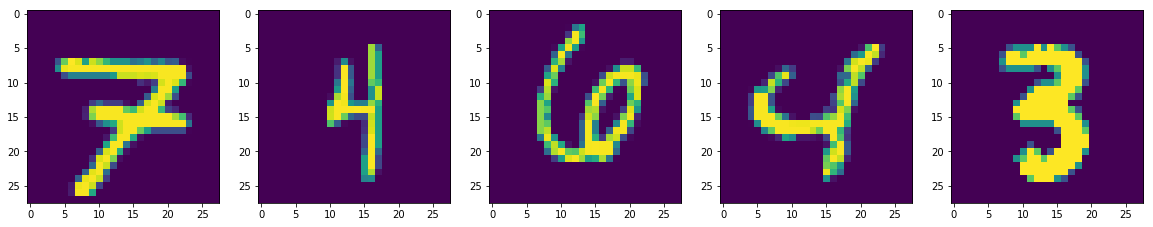

In [14]:
training_iter = enumerate(train_loader)

batch_idx, (training_sample , sample_labels) = next(testing_iter)

images=[]

for i in range(0,5):
  images.append(training_sample[i,0,:])

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    
print("Their corresponding lables: ", sample_labels[0:5])

### Create testing optimzer
The object will optmize the paramter base on different algo.

for the case here, we are using Adam optimization (gradient decent using mometum and weight decay)

In [0]:
test_optimizer = optim.Adam(net.parameters(), lr=learning_rate)

### Move the label to GPU

In [0]:
training_sample_gpu = training_sample.to(device)
sample_labels_gpu = sample_labels.to(device)

### Zero out the stored grad

In [0]:
test_optimizer.zero_grad()

### Forward Pass

In [18]:
test_output = net.forward(training_sample_gpu)
print(test_output.shape)
print(test_output[0])

torch.Size([32, 10])
tensor([-2.4278, -2.4037, -2.1369, -2.2471, -2.2893, -2.2697, -2.3835, -2.2134,
        -2.4313, -2.2682], device='cuda:0', grad_fn=<SelectBackward>)


### Compute the loss
**notice that the label is not in one-hot vector form**

In [19]:
num_of_class = test_output.shape[1]

#print(test_output.shape)
#print(sample_labels_gpu.shape)

#print(test_output[0].view(1,num_of_class).shape)
#print(sample_labels_gpu[0].view(1).shape)

#print(test_output[0].view(1,num_of_class))
#print(sample_labels_gpu[0].view(1))

test_loss = F.cross_entropy(test_output,sample_labels_gpu)
# the dimension is modified to satisfy batch requirement
print("Loss of the first sample : ", test_loss)

Loss of the first sample :  tensor(2.2830, device='cuda:0', grad_fn=<NllLossBackward>)


###We can verify the cross entropyloss by the following code:

In [20]:
import numpy as np
foo_1 = torch.Tensor([[0.5,0.01,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01]])
# This is not the probability , more like a score of some sort

foo_2 = torch.Tensor([3]).long()
# output label

sm = nn.Softmax(dim=1)
foo_3 = sm(foo_1)
# softmax operation

print("pytorch function cross entropy loss : ",F.cross_entropy(foo_1,foo_2))

print("Cross entropy loss : ", -np.log(foo_3[0][foo_2[0]]))

pytorch function cross entropy loss :  tensor(2.3727)
Cross entropy loss :  tensor(2.3727)


### back prop

In [21]:
print("Before back prop : ", params[1].grad)

test_loss.backward()

print("After back prop : ", params[1].grad)

Before back prop :  None
After back prop :  tensor([-0.0031,  0.0016, -0.0043,  0.0075,  0.0013,  0.0106,  0.0045, -0.0020,
        -0.0012,  0.0062], device='cuda:0')


### Update the paramter base on different optimization method

In [22]:
print("Before optmizating the paramteres : ",params[1])

test_optimizer.step()

print("After optmizating the paramteres : ",params[1])

Before optmizating the paramteres :  Parameter containing:
tensor([ 0.1697, -0.1506, -0.1494,  0.1879, -0.0321,  0.1789, -0.0843,  0.0142,
        -0.0524, -0.0234], device='cuda:0', requires_grad=True)
After optmizating the paramteres :  Parameter containing:
tensor([ 0.1698, -0.1507, -0.1493,  0.1878, -0.0322,  0.1788, -0.0844,  0.0143,
        -0.0523, -0.0235], device='cuda:0', requires_grad=True)


## Basically this is one step to do forward prop , back prop , compute loss and update parameter

## Create a training sequence to update the parameters

### Training function ( generate model base on training set)

In [0]:
def train(epoch):
  
  # set the network into training mode. No effect here since dropout / batch norm etc. is not used
  net.train()
  
  for batch_idx, (data, target) in enumerate(train_loader):
    
    # move the data to cuda
    data_cuda = data.to(device)
    target_cuda = target.to(device)
    
    # Clear the autograd
    optimizer.zero_grad()
    
    # forward pass
    output = net(data_cuda)
    
    # Cost function
    loss = F.cross_entropy(output, target_cuda)
    
    # back prop
    loss.backward()
    
    # optimise
    optimizer.step()
    
    # for each batch of the data
    if batch_idx % 1000 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, # number of loop through entrie training set
        batch_idx * len(data_cuda), # how many data has been processed
        len(train_loader.dataset), # total number of data in entrie training set
        100. * batch_idx / len(train_loader), # percentage completed
        loss.item())) # Value of loss fucntion
      
      # torch.Tensor.item() return the value inside the Tensor object
      

In [24]:
for epoch in range(10):
  train(epoch)
print("Finished training!")

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.301251
Train Epoch: 0 [32000/60000 (53%)]	Loss: 1.186038
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.541502
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.652775
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.204977
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.706145
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.423922
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.295907
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.247410
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.148036
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.383168
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.196053
Train Epoch: 6 [0/60000 (0%)]	Loss: 0.472973
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.093193
Train Epoch: 7 [0/60000 (0%)]	Loss: 0.364222
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.201038
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.262786
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.359910
Train Epoch: 9 [0/60000 (0%)]	Loss: 0.275519
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.324108
Finished training!


### Testing fucntion ( Evaulate model base on testing set )

In [0]:
def test():
  
  # set the model in evaulation mode
  net.eval()
  
  test_loss = 0
  correct = 0
  
  # disable autograd
  with torch.no_grad():
    for data, target in test_loader:
      
      data_cuda = data.cuda()
      target_cuda = target.cuda()
      
      output = net(data_cuda)
      #print(output)
      test_loss += F.cross_entropy(output, target_cuda).item()
      #print(test_loss)
      
      # Transform the output prediction to the array indices
      pred = output.data.max(1, keepdim=True)[1].to("cpu")
      
      # compare the target with prediction
      # view the target as shape of pred
      correct += pred.eq(target.data.view_as(pred)).sum()

  # average loss
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, 
    correct, 
    len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [0]:
# create the model path and file
# prevent permission error
#!mkdir /results
#!touch /results/model.pth

## Test the performance on training set

In [30]:
test()


Test set: Avg. loss: 0.0026, Accuracy: 9740/10000 (97%)



## Input Sample

Their corresponding lables:  tensor([1, 7, 6, 9, 6])


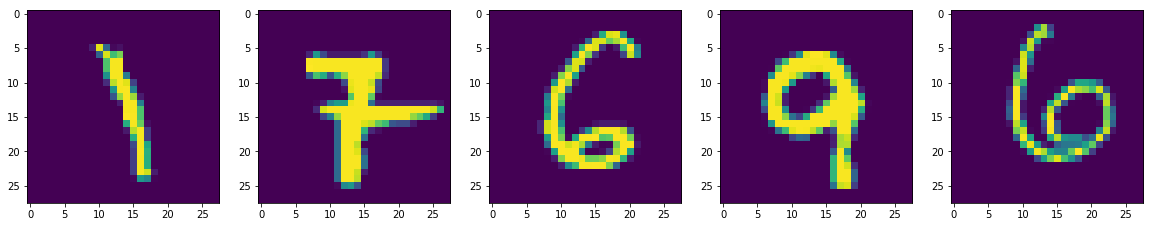

In [31]:
sample_idx = 20

batch_idx, (training_sample , sample_labels) = next(testing_iter)

images=[]

for i in range(0,5):
  images.append(training_sample[i,0,:])

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    
print("Their corresponding lables: ", sample_labels[0:5])

## Fit into the training 

In [56]:
with torch.no_grad():
  net.eval()
  output_test = net(training_sample[0:5,:].to(device))
print("The output of the network : \n",output_test)
# notice that it is not the probability

The output of the network : 
 tensor([[-1.0879e+01, -1.2832e-01, -6.6649e+00, -3.5244e+00, -6.5254e+00,
         -4.9165e+00, -1.1192e+01, -5.1919e+00, -3.0185e+00, -3.6336e+00],
        [-1.6047e+01, -4.6774e+00, -7.0907e+00, -7.7705e+00, -1.0509e+01,
         -1.6383e+01, -2.4725e+01, -1.1431e-02, -7.4867e+00, -8.4224e+00],
        [-5.1630e+00, -1.5784e+01, -9.6379e+00, -1.6063e+01, -1.4025e+01,
         -5.7636e+00, -9.1209e-03, -2.1107e+01, -8.8117e+00, -1.7671e+01],
        [-2.0641e+01, -2.5120e+01, -1.5398e+01, -1.3900e+01, -7.9307e+00,
         -1.6678e+01, -2.6084e+01, -8.9659e+00, -1.1539e+01, -4.9782e-04],
        [-7.9348e+00, -1.0765e+01, -8.3419e+00, -1.4532e+01, -8.5141e+00,
         -8.2057e+00, -1.2674e-03, -1.7178e+01, -8.6500e+00, -1.5835e+01]],
       device='cuda:0')


In [59]:
print(training_sample.shape)

torch.Size([32, 1, 28, 28])


In [48]:
# Report the indices with maximum score

prediction = output_test.max(dim = -1)
print("The prediction from the network : ")
print(prediction[1].to("cpu").numpy())

The prediction from the network : 
[1 7 6 9 6]


# Try upload your own image and test the ConvNet

### you can create the image in the follwing websit: 

http://kleki.com

Please use a larger brush or the storke will disappear after resize. (around 75)

The follwing code will automatically resize the image and fed it into the network for prediction

In [49]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 2019_08_05_Kleki.png to 2019_08_05_Kleki.png
User uploaded file "2019_08_05_Kleki.png" with length 38063 bytes


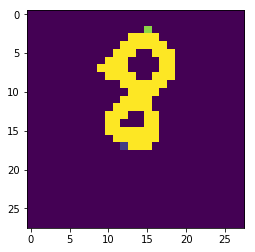

The output of the network : 
 tensor([[-7.5527, -6.6278, -5.6047, -0.7544, -2.8904, -3.3899, -8.9237, -5.8174,
         -2.1610, -1.1502]], device='cuda:0')
The prediction from the network : 
[3]


In [65]:
import cv2

def inverse_color(image):

    height,width = image.shape
    img2 = image.copy()

    for i in range(height):
        for j in range(width):
            img2[i,j] = (255-image[i,j]) 
    return img2

img = cv2.imread(fn)
resized_img = cv2.resize(img, (28, 28))
gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
gray = inverse_color(gray)

normalised_img = gray / 255

plt.imshow(normalised_img)
plt.show()

input_user = torch.Tensor(normalised_img)

with torch.no_grad():
  net.eval()
  predict_user = net(input_user.to(device).view(1,1,28,28))
print("The output of the network : \n",predict_user)

prediction = predict_user.max(dim = -1)
print("The prediction from the network : ")
print(prediction[1].to("cpu").numpy())